In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('regularized.csv', dtype={'VehOdo':float}) 
df.head()

,Unnamed: 0,Unnamed: 0.1,RefId,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Model,Trim,...,Nationality,Size,TopThreeAmericanName,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,0,326,1,2010,0,2,13,SPECTRA,EX,...,2,5,0,7535.0,10650.0,33619,5,6100.0,0,533
1,1,1,42991,0,2009,1,3,5,STRATUS V6 2.7L V6 M,SXT,...,0,5,1,6461.0,7478.0,32124,5,4000.0,0,1630
2,2,2,55273,0,2010,2,2,5,CALIBER,SE,...,0,5,1,8102.0,11350.0,74135,27,7500.0,0,693
3,3,3,29058,0,2009,2,4,6,FREESTAR FWD V6 3.9L,S,...,0,11,1,6658.0,7691.0,85018,2,4725.0,0,1633
4,4,4,34991,0,2009,1,4,4,TOWN & COUNTRY FWD V,Bas,...,0,11,1,6811.0,7856.0,75236,32,5670.0,0,1623


In [3]:
df.isnull().sum()

Unnamed: 0                     0
Unnamed: 0.1                   0
RefId                          0
IsBadBuy                       0
PurchDate                      0
Auction                        0
VehicleAge                     0
Make                           0
Model                          0
Trim                           0
SubModel                       0
Transmission                   0
WheelType                      0
VehOdo                         0
Nationality                    0
Size                           0
TopThreeAmericanName           0
MMRCurrentAuctionCleanPrice    0
MMRCurrentRetailCleanPrice     0
VNZIP1                         0
VNST                           0
VehBCost                       0
IsOnlineSale                   0
WarrantyCost                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53772 entries, 0 to 53771
Data columns (total 24 columns):
Unnamed: 0                     53772 non-null int64
Unnamed: 0.1                   53772 non-null int64
RefId                          53772 non-null int64
IsBadBuy                       53772 non-null int64
PurchDate                      53772 non-null int64
Auction                        53772 non-null int64
VehicleAge                     53772 non-null int64
Make                           53772 non-null int64
Model                          53772 non-null object
Trim                           53772 non-null object
SubModel                       53772 non-null object
Transmission                   53772 non-null int64
WheelType                      53772 non-null int64
VehOdo                         53772 non-null float64
Nationality                    53772 non-null int64
Size                           53772 non-null int64
TopThreeAmericanName           53772 non-null int64
MM

In [5]:
l = list(set(df.Model))

In [6]:
model_freq = {}
models = list(df.Model)
for i in l:
    if not i in model_freq:
        model_freq[i] = models.count(i)
for i, j in model_freq.items():
    print(i, '\t', j)

LACROSSE 3.6L V6 SFI 	 3
WRANGLER 6C 	 2
SPECTRA 2.0L I-4 EFI 	 11
STRATUS V6 2.4L I-4 	 3
ALTIMA MFI V6 3.5L D 	 1
S10 PICKUP 2WD 4C 	 15
TACOMA PICKUP 2WD V6 	 2
CAMRY V6 3.0L V6 EFI 	 2
ACCORD 4C 2.3L I-4 E 	 3
MAGNUM V6 2.7L V6 MP 	 185
SUNFIRE 2.2L I-4 MPI 	 3
AVEO 1.6L I-4 EFI DO 	 26
LUCERNE V6 3.8L V6 S 	 2
FOCUS 	 679
ELANTRA 2.0L I4 MPI 	 140
COUPE 1.9L I-4 SFI D 	 2
1500 SILVERADO PICKU 	 477
SUBURBAN 1500 2WD 	 42
COBALT 	 853
ASCENDER 4WD 6C 	 5
PILOT 3.5L V6 MPI 	 4
OUTLANDER 2WD V6 	 1
3.2 TL 	 7
ELEMENT 2WD 	 17
TITAN PICKUP 2WD V8 	 125
MARINER 4WD V6 3.0L 	 37
FOCUS 2.3L I-4 DOHC 	 11
MONTANA FWD 3.4L V6 	 13
626 4C 	 3
FREESTYLE AWD V6 3.0 	 18
TIBURON 2.7L V6 MPI 	 4
XA 1.5L I4 EFI 	 1
LIBERTY 2WD V6 3.7L 	 122
FUSION 4C 2.3L I4 EF 	 80
VIBE AWD 1.8L I4 MPI 	 1
MOUNTAINEER 2WD V6 	 1
SEBRING V6 2.7L V6 M 	 126
SABLE 3.0L V6 EFI 2B 	 2
STS V6 	 1
GRAND CHEROKEE 4WD 6 	 40
ASCENDER 2WD 6C 	 55
CAMRY 4C 2.4L I-4 EF 	 9
SABLE 3.0L V6 EFI 4B 	 4
L SERIES 2.2L I4 SFI 	 2


VUE 2WD V6 	 5
MONTERO SPORT 4WD V6 	 8
EQUINOX FWD V6 3.4L 	 125
F150 PICKUP 2WD V6 4 	 78
FREESTYLE FWD V6 3.0 	 111
EXPLORER 2WD V8 	 11
YUKON AWD V8 	 1
SEBRING V6 2.7L V6 S 	 1
HHR 	 432
SEBRING 4C 2.4L I4 E 	 304
RENO 2.0L I-4 EFI DO 	 1
COUPE 	 3
MPV 2WD V6 MFI V6 2. 	 3
COMMANDER 4WD V6 	 12
MONTANA AWD 3.5L V6 	 5
COUPE 1.9L I-4 SFI S 	 2
AVENGER V6 Unspecifi 	 3
TRACKER 2WD V6 2.5L 	 4
MALIBU V6 3.1L V6 SF 	 87
S10 PICKUP 2WD 4C 2. 	 13
GRAND VITARA 2WD 2.7 	 4
VENTURE AWD V6 	 2
INTREPID 3.5L V6 MPI 	 10
CHEROKEE 2WD 6C 	 1
IMPALA V6 3.5L V6 SF 	 171
MALIBU V6 3.5L V6 SF 	 243
IMPALA 3.5L V6 SFI F 	 20
MATRIX 2WD Unspecifi 	 1
CAMRY 4C 	 293
HHR 2.4L I4 MPI 	 8
MAZDA6 2.3L I-4 MPI 	 1
RAINIER RWD V8 	 3
LACROSSE 3.8L V6 SFI 	 35
FREESTAR FWD V6 3.9L 	 262
GRAND PRIX 	 700
STRATUS 4C 2.4L I4 M 	 230
CARAVAN FWD V6 3.3L 	 284
YUKON 2WD V8 	 19
SORENTO 2WD 3.5L V6 	 74
YUKON XL 1500 4WD 	 4
MUSTANG V6 	 239
RIO 1.6L I4 MPI 	 59
CAMRY V6 3.5L V6 SFI 	 4
VOYAGER FWD 4C 2.4L 	 10


Removing IDs and too much precise categorical data

In [7]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'RefId','Model', 'Trim', 'SubModel', 'VNZIP1'], 1)
df = df[df.MMRCurrentRetailCleanPrice != 0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53404 entries, 0 to 53771
Data columns (total 17 columns):
IsBadBuy                       53404 non-null int64
PurchDate                      53404 non-null int64
Auction                        53404 non-null int64
VehicleAge                     53404 non-null int64
Make                           53404 non-null int64
Transmission                   53404 non-null int64
WheelType                      53404 non-null int64
VehOdo                         53404 non-null float64
Nationality                    53404 non-null int64
Size                           53404 non-null int64
TopThreeAmericanName           53404 non-null int64
MMRCurrentAuctionCleanPrice    53404 non-null float64
MMRCurrentRetailCleanPrice     53404 non-null float64
VNST                           53404 non-null int64
VehBCost                       53404 non-null float64
IsOnlineSale                   53404 non-null int64
WarrantyCost                   53404 non-null int64

## Normalization

In order to have a common scale for the data, we nonrmalize each non-binary attribute, 
both categorical and numerical, keeping in mind that categorical data don't correspond to quantities. 
This also permits to us to vizualize better the plots, because all the columns need the same focus, being beetween 0 and 1.

<img src="Schermata 2020-01-06 alle 13.31.03.png"/>

While I had some problem with the MinMaxScaler of the module, I wrote the function on my own, then to be sure I also reperformed MinMax.

In [9]:
def normalize(column_vals):
    min_val = min(column_vals)
    max_val = max(column_vals)
    funct = lambda x : (x - min_val) / (max_val - min_val)
    return list(map(funct, column_vals))
    

In [10]:
df.PurchDate = normalize(df.PurchDate)
df.Auction = normalize(df.Auction)
df.VehicleAge = normalize(df.VehicleAge)
df.Make = normalize(df.Make)
df.Transmission = normalize(df.Transmission)
df.WheelType = normalize(df.WheelType)
df.VehOdo = normalize(df.VehOdo)
df.Nationality = normalize(df.Nationality)
df.Size = normalize(df.Nationality)
df.Nationality = normalize(df.Size)
df.MMRCurrentAuctionCleanPrice = normalize(df.MMRCurrentAuctionCleanPrice)
df.MMRCurrentRetailCleanPrice = normalize(df.MMRCurrentRetailCleanPrice)
df.VNST = normalize(df.VNST)
df.VehBCost = normalize(df.VehBCost)
df.WarrantyCost = normalize(df.WarrantyCost)

In [11]:
df.head()

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,1.0,0.0,0.222222,0.419355,0.0,0.5,0.505813,0.666667,0.666667,0,0.193620,0.244844,0.138889,0.136232,0,0.010091
1,0,0.0,0.5,0.333333,0.161290,0.0,0.5,0.788544,0.000000,0.000000,1,0.164086,0.164078,0.138889,0.075362,0,0.166003
2,0,1.0,1.0,0.222222,0.161290,0.0,0.5,0.367896,0.000000,0.000000,1,0.209212,0.262667,0.750000,0.176812,0,0.032831
3,0,0.0,1.0,0.444444,0.193548,0.0,0.5,0.677858,0.000000,0.000000,1,0.169504,0.169501,0.055556,0.096377,0,0.166430
4,0,0.0,0.5,0.444444,0.129032,0.0,0.0,0.652512,0.000000,0.000000,1,0.173711,0.173703,0.888889,0.123768,0,0.165009


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=400)
kmeans = kmeans.fit(X)

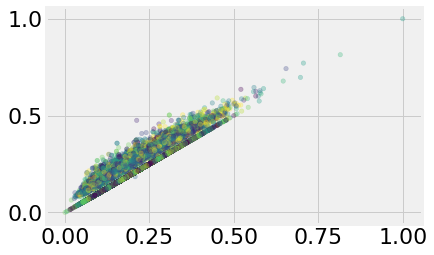

In [14]:
plt.scatter(df['MMRCurrentAuctionCleanPrice'], df['MMRCurrentRetailCleanPrice'], 
            c=kmeans.labels_, s=20, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

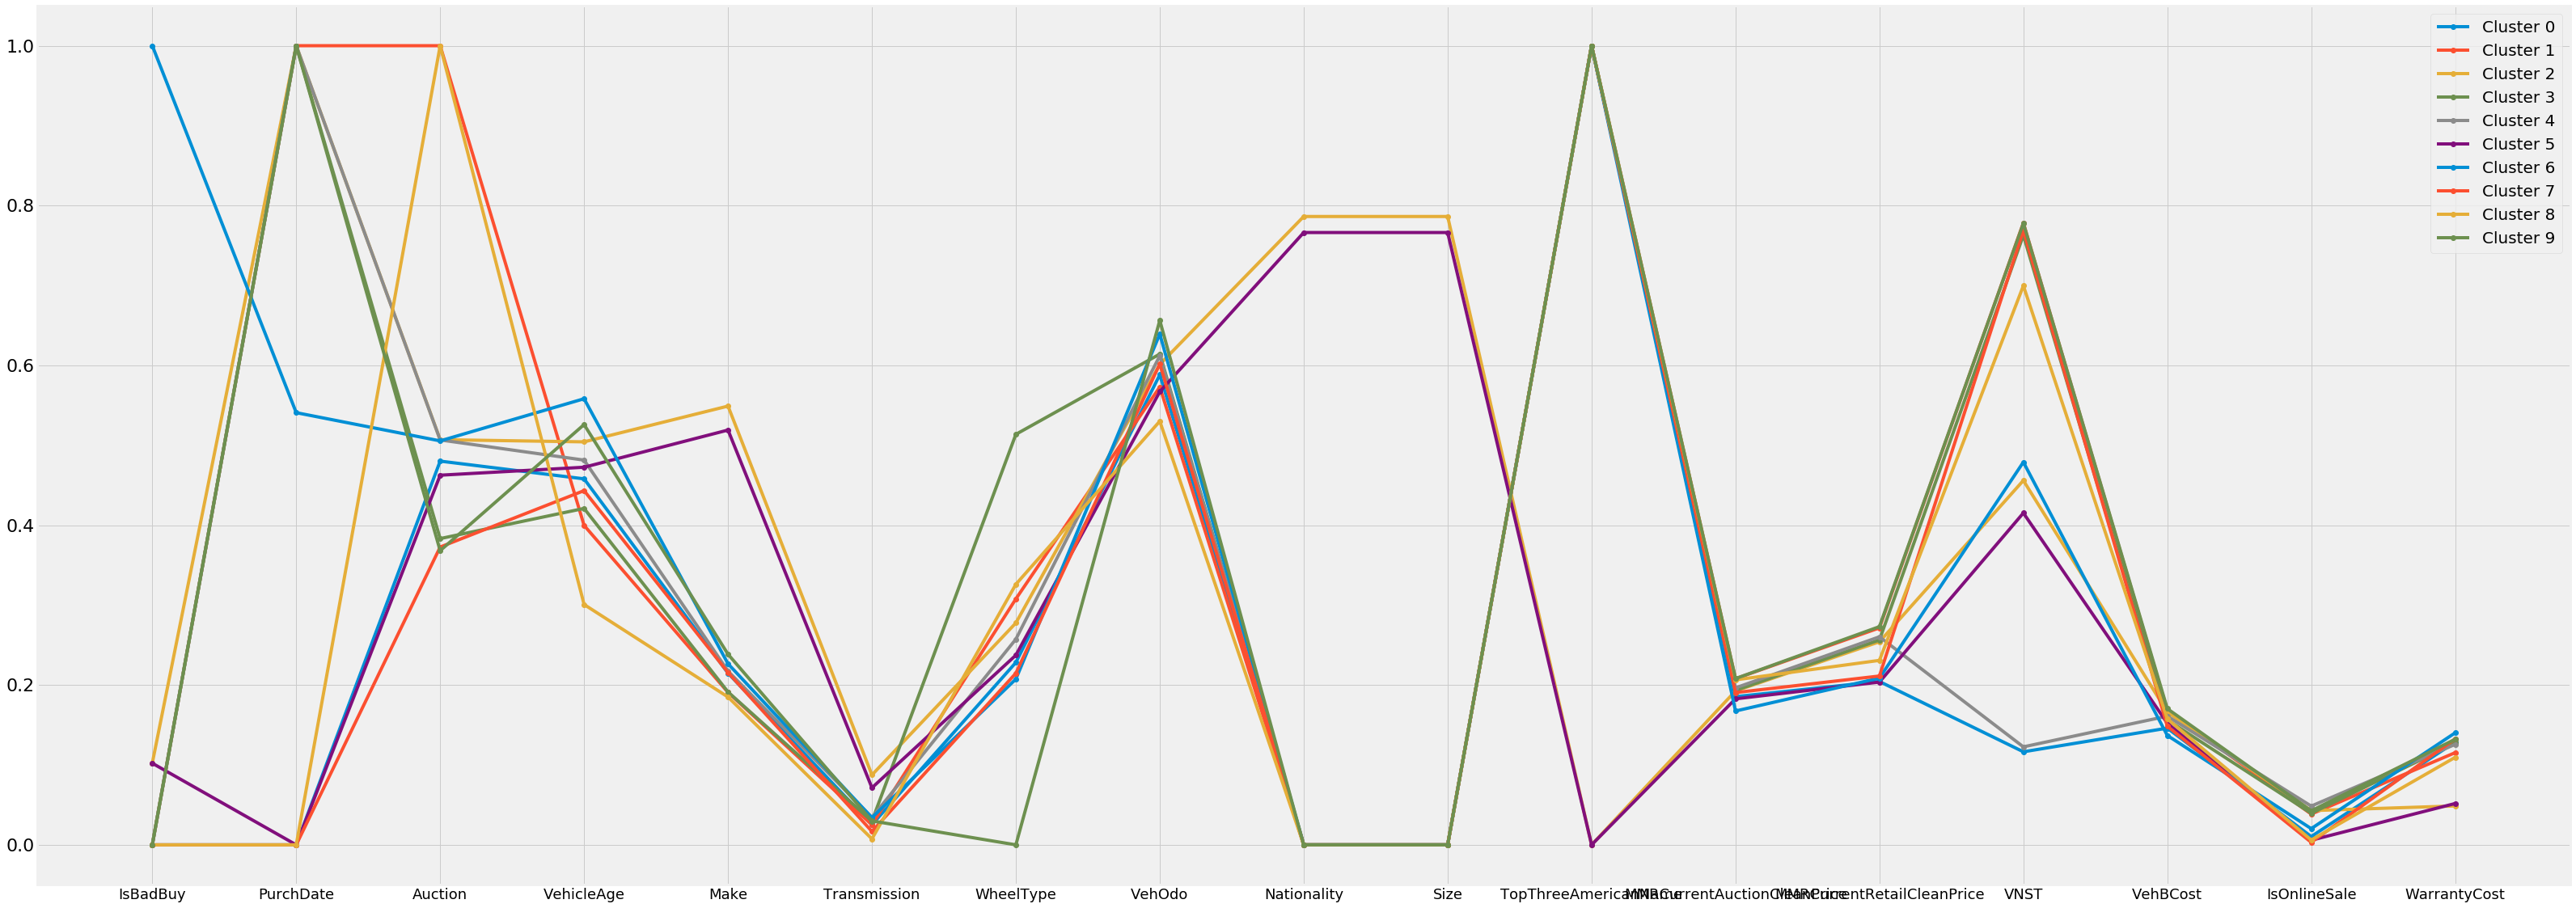

In [15]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(50, 20))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i, linewidth=4)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

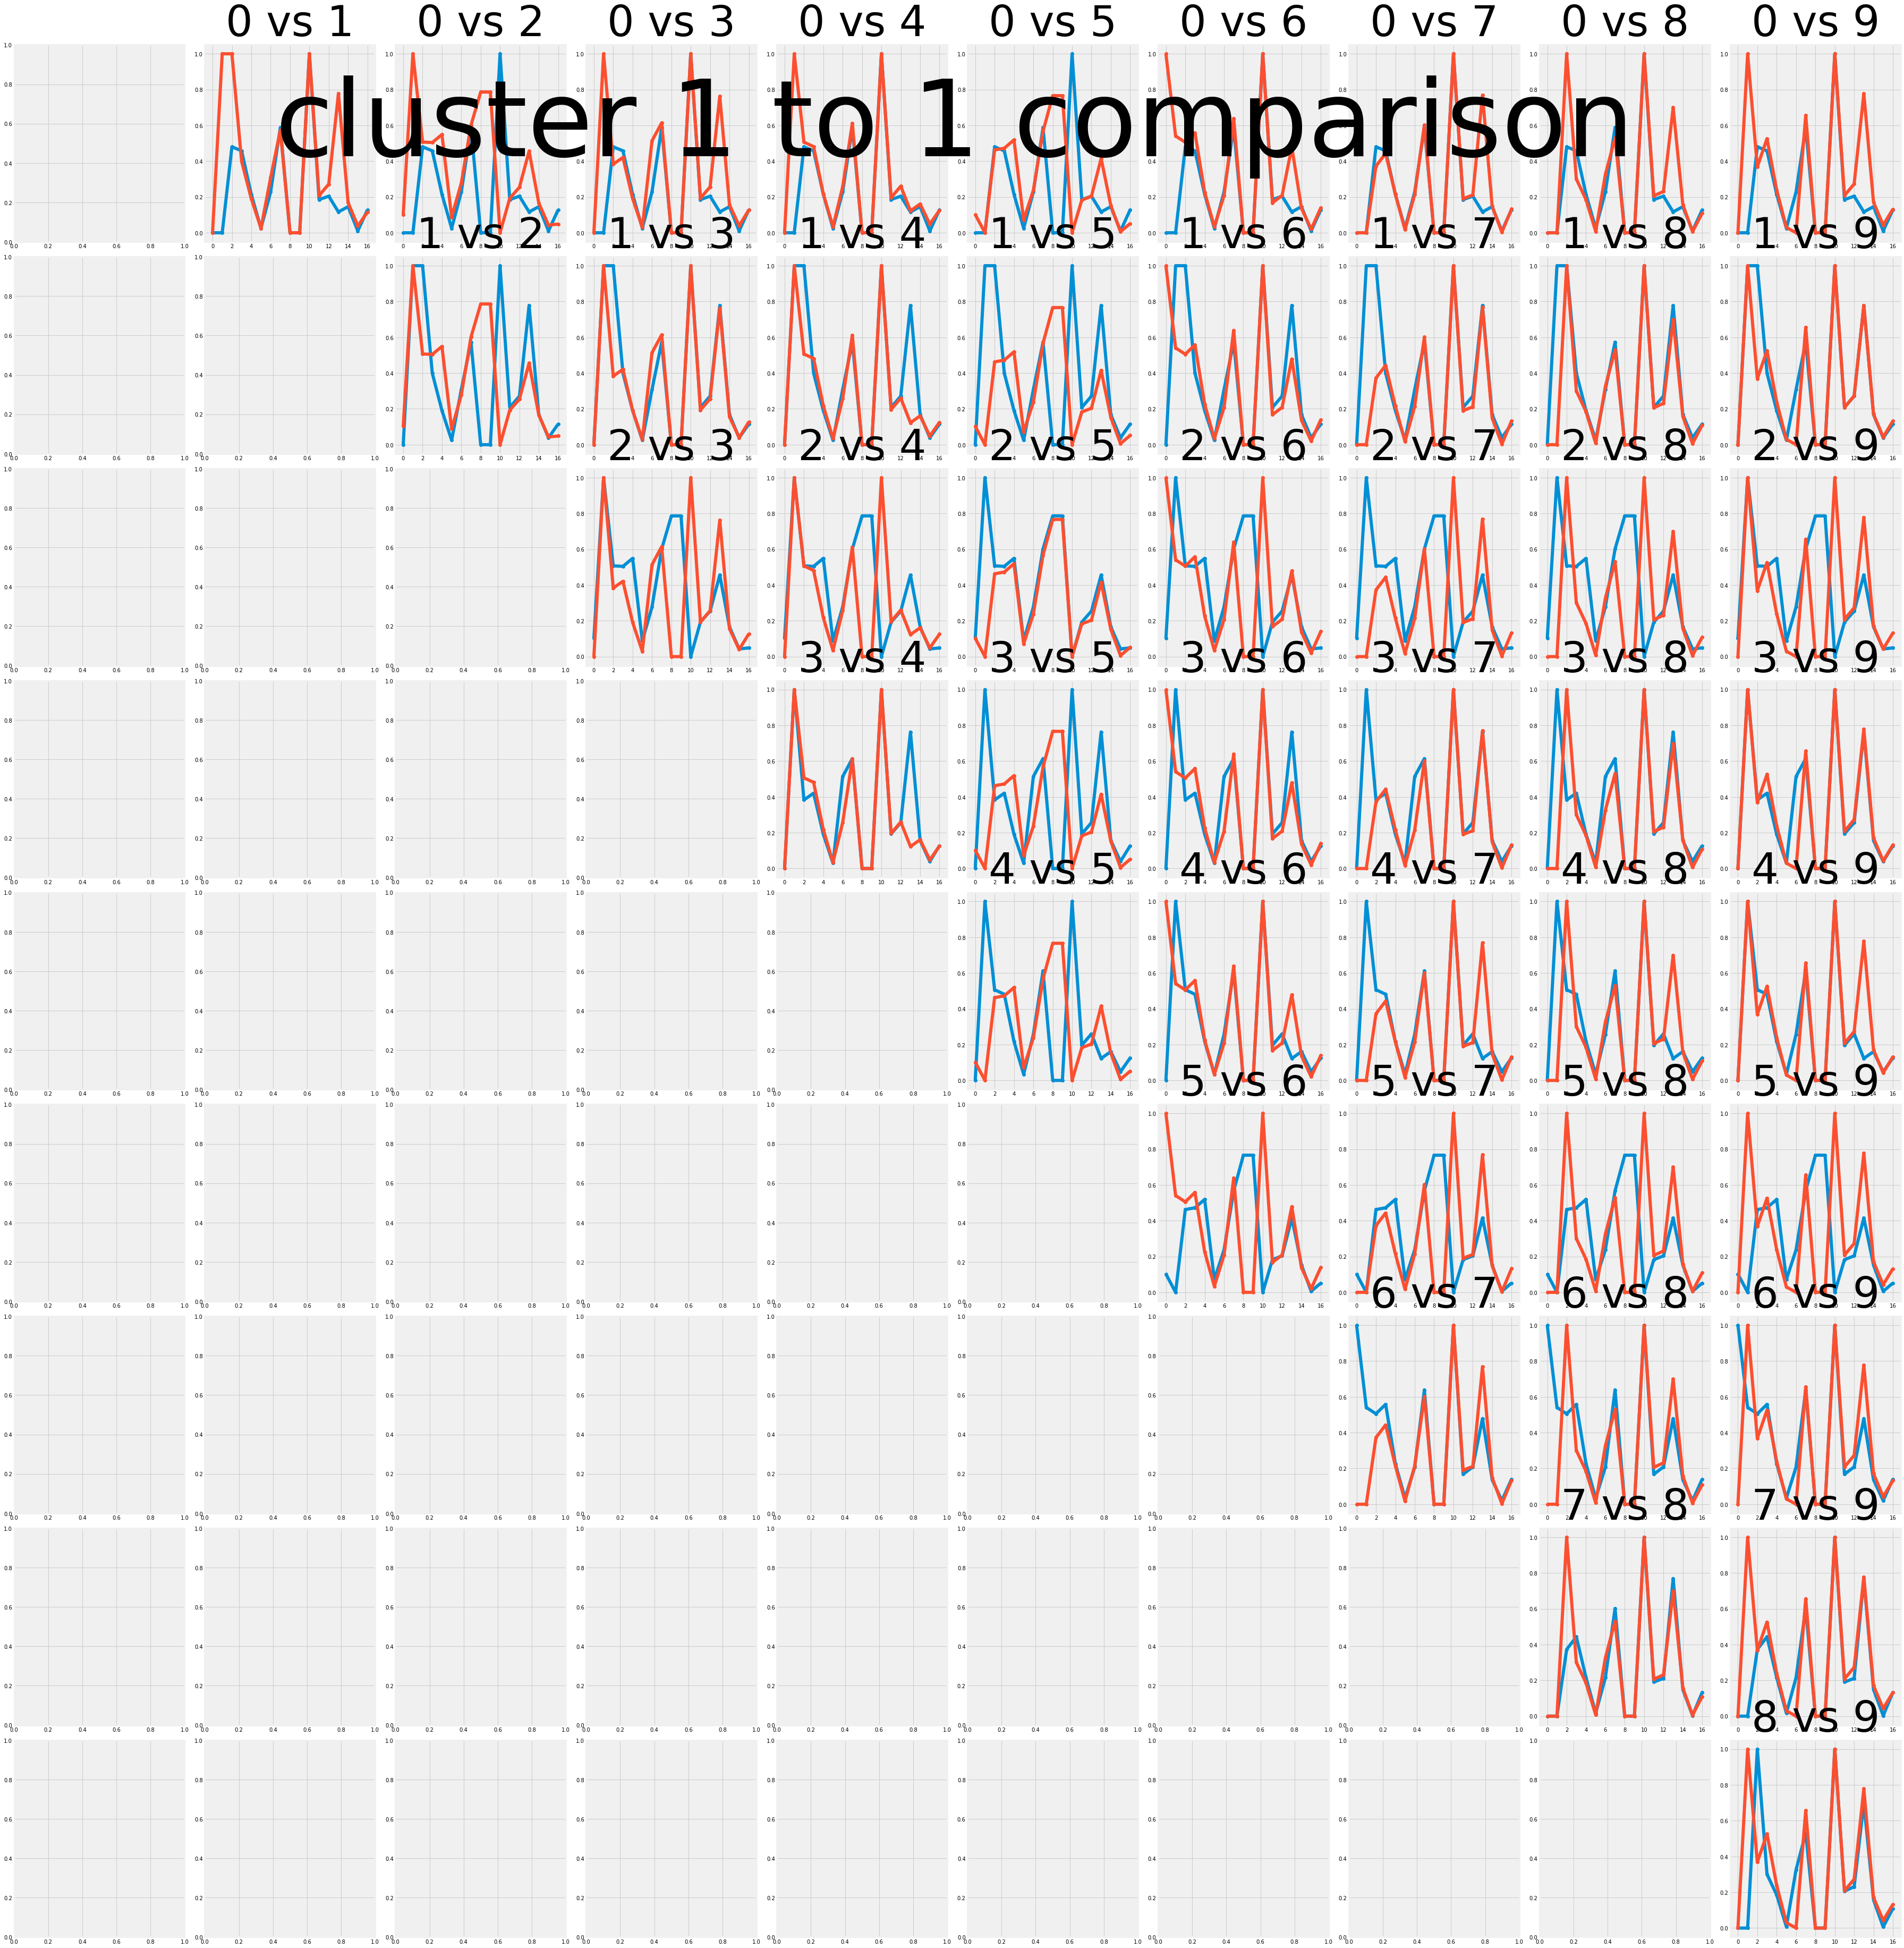

In [16]:
nr = len(centers)-1
nc = len(centers)
fig, ax = plt.subplots(nr, nc, figsize=(50, 50))
fig.tight_layout()

for i in range(0, len(centers)-1):
    for j in range(i+1, len(centers)):
        ax[i, j].plot(centers[i], marker='o', label='Cluster %s' % i, linewidth=6)
        ax[i, j].plot(centers[j], marker='o', label='Cluster %s' % j, linewidth=6)
        ax[i, j].set_title(str(i)+ ' vs '+ str(j), fontsize=80)
plt.suptitle('cluster 1 to 1 comparison', fontsize=200)
plt.show()

I effect, there are no overlapping clusters, but many of them are very similar. There in no well-separation

In [17]:
df.IsBadBuy.unique()

array([1, 0])

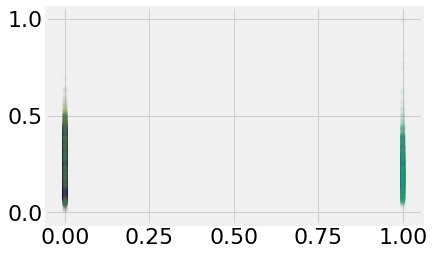

In [18]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))
plt.scatter(df['IsBadBuy'], df['MMRCurrentRetailCleanPrice'], 
            c=kmeans.labels_, s=20, alpha=0.03)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

[0 1 1 ... 1 0 1]
For n_clusters = 2 The average silhouette_score is : 0.38868667153407205
[2 0 1 ... 1 2 0]
For n_clusters = 3 The average silhouette_score is : 0.314187140269119
[0 2 1 ... 1 0 3]
For n_clusters = 4 The average silhouette_score is : 0.3229893611419216
[3 2 0 ... 0 3 4]
For n_clusters = 5 The average silhouette_score is : 0.2611435650877028
[3 2 5 ... 0 3 4]
For n_clusters = 6 The average silhouette_score is : 0.23798649251207524
[6 4 7 ... 7 6 3]
For n_clusters = 8 The average silhouette_score is : 0.23035442504777376
[2 0 6 ... 6 2 5]
For n_clusters = 10 The average silhouette_score is : 0.23346147066934164


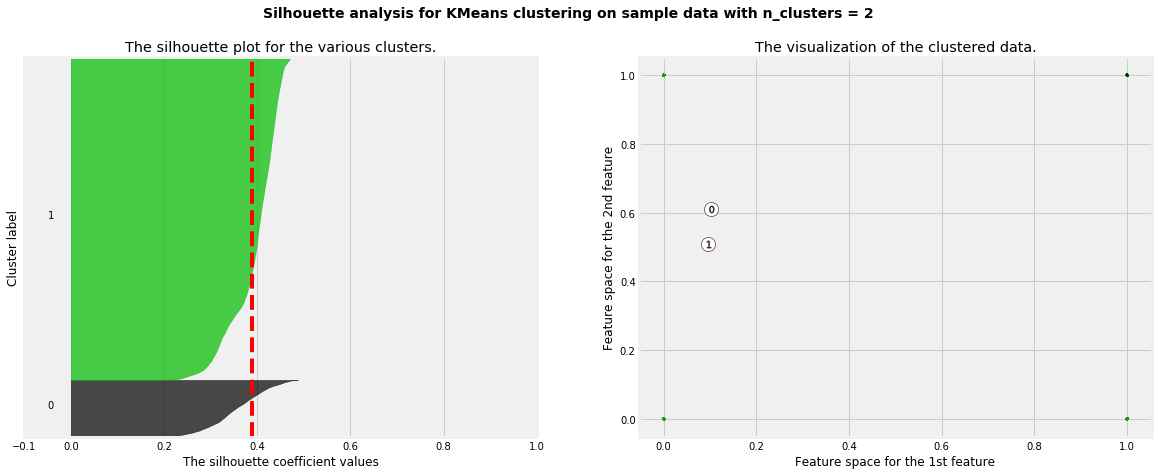

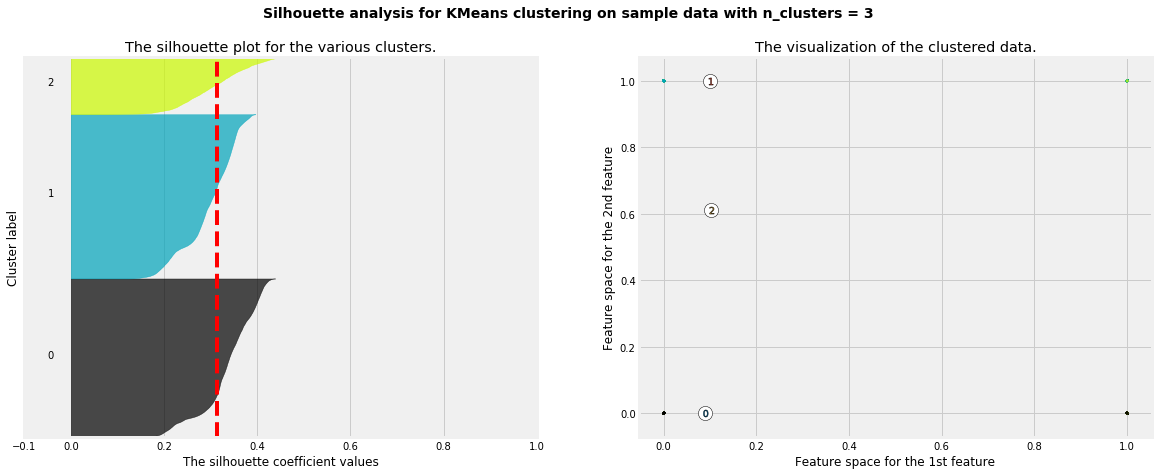

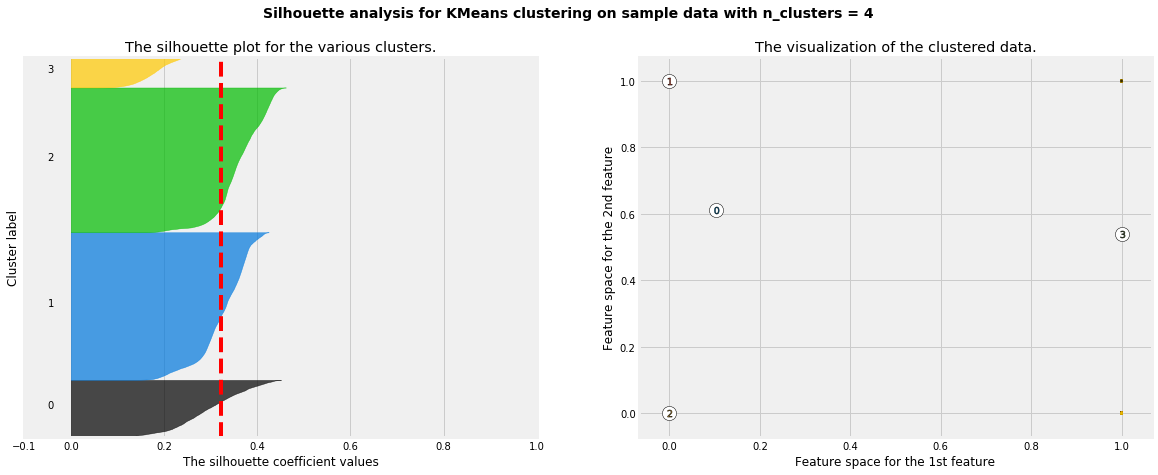

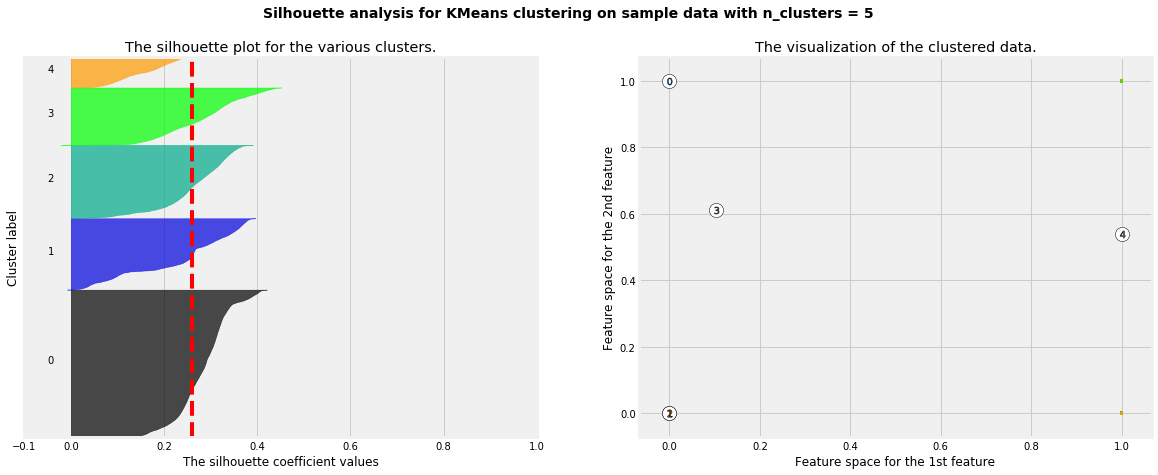

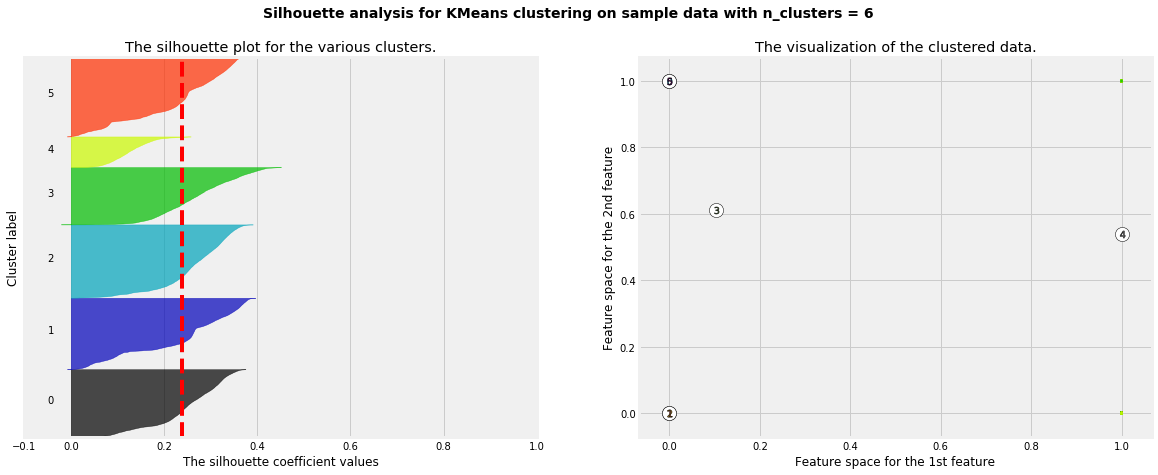

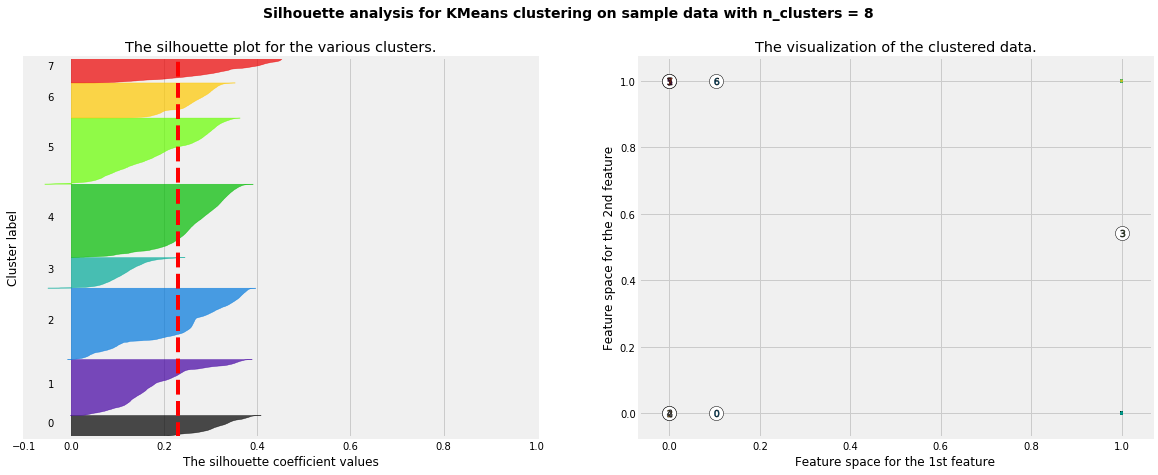

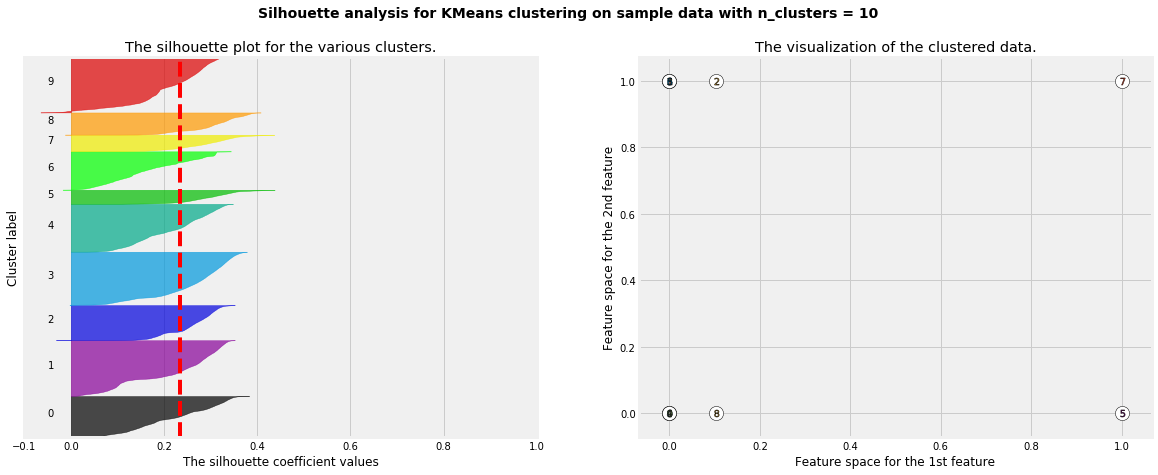

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [ 2, 3, 4, 5, 6, 8, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    print(cluster_labels)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

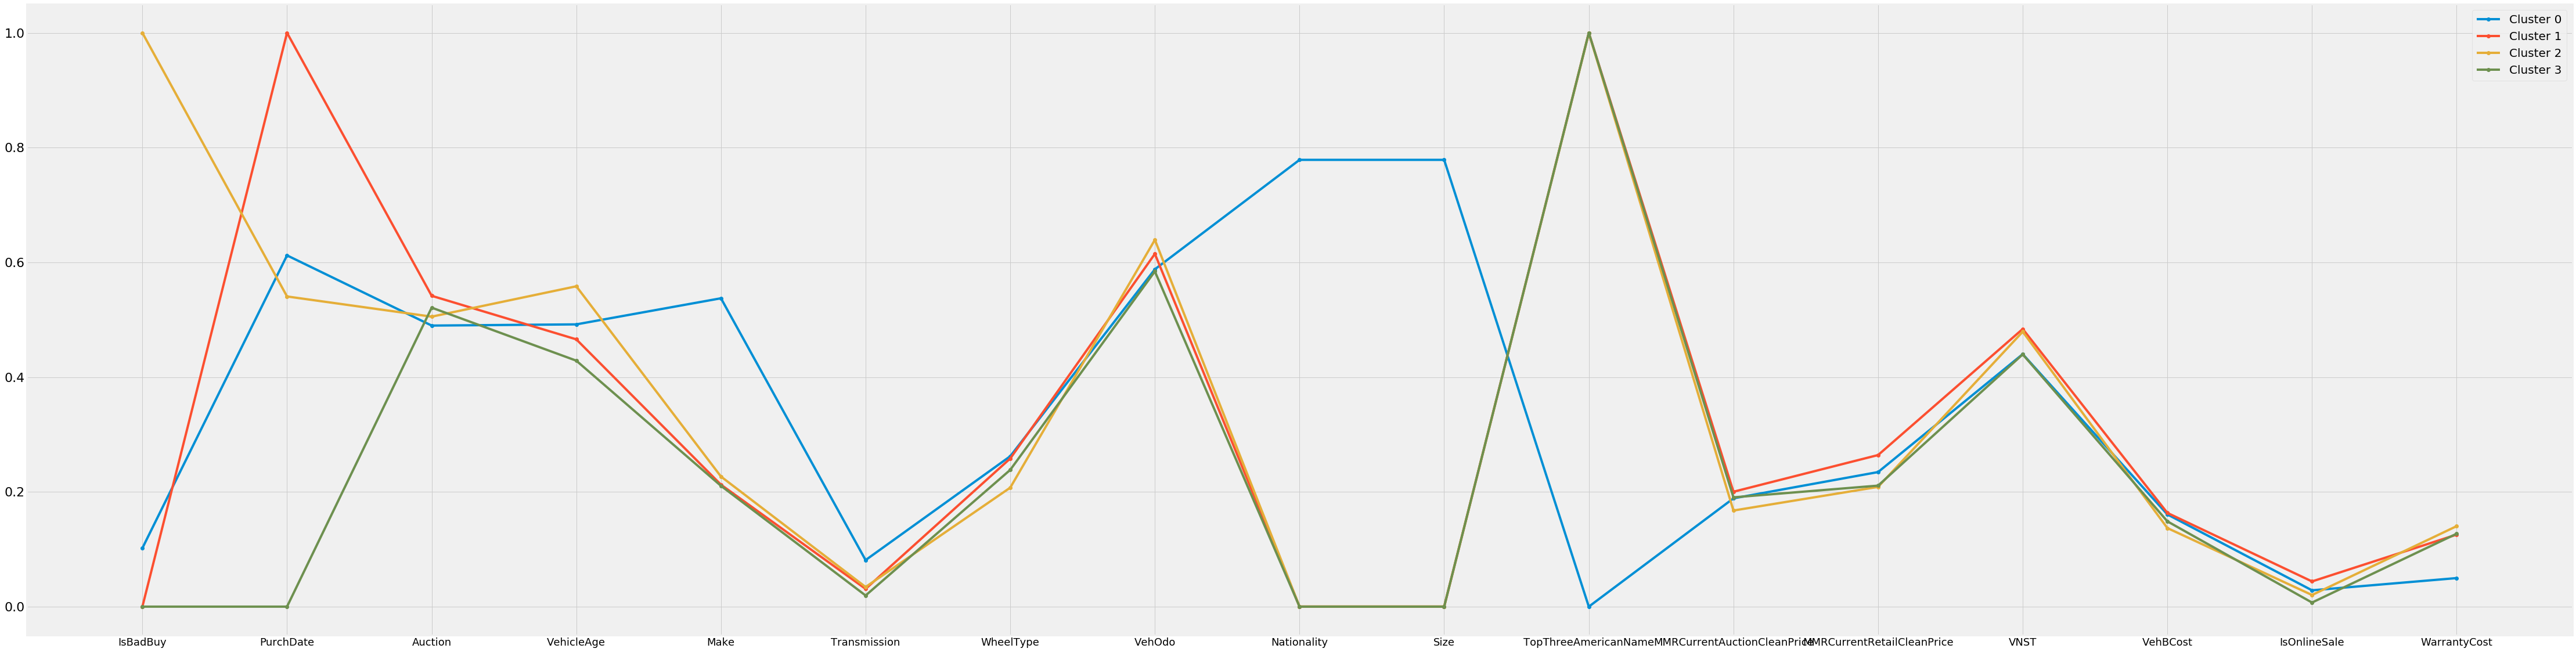

In [20]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=400)
kmeans = kmeans.fit(X)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.figure(figsize=(70, 20))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i, linewidth=4)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

While SSE says that 10 is the best k, we see that 10 clusters are not well separated. We think that k=4 with silhouette=0.322 is the best choice

SSE and Clustering Validation

In [21]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 28734.954432113536
Silhouette 0.3229893611419216


Knee method for the best K

In [22]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=400)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

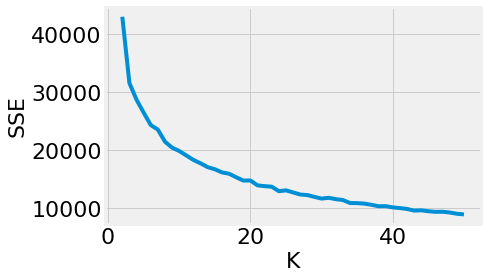

In [23]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

While a k=10 seems to be the perfect k according to the SSE, seeing the parallel coordinates plot we see that most of the ks are overlapping

# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [25]:
dbscan = DBSCAN(eps=0.7, min_samples=500)
dbscan.fit(X)
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.31452786812888617


I tried different eps and min_samples. This gives the best silhouette

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

In [26]:
# Labels
dbscan.labels_[:10]

array([-1,  0,  1,  0,  0,  5,  2,  0,  0,  1])

Observing the size of each cluster

In [27]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([ 3129, 19787, 19218,  3870,  2142,  1892,  2586,   780]))

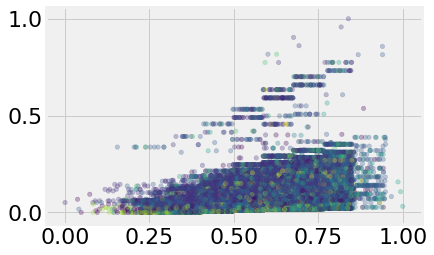

In [29]:
plt.scatter(df['VehOdo'], df['WarrantyCost'], c=dbscan.labels_, s=20, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Knee Method to estimate the best eps

In [30]:
from scipy.spatial.distance import pdist, squareform

In [31]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[2.08162855 2.08583045 2.24902033 ... 2.27225599 1.6906036  2.17387614]

[[0.         2.08162855 2.08583045 ... 2.02579588 1.22589827 2.06680089]
 [2.08162855 0.         1.36107662 ... 1.17531189 2.47503627 1.3627303 ]
 [2.08583045 1.36107662 0.         ... 0.46331173 2.23779231 1.69485625]
 ...
 [2.02579588 1.17531189 0.46331173 ... 0.         2.27225599 1.6906036 ]
 [1.22589827 2.47503627 2.23779231 ... 2.27225599 0.         2.17387614]
 [2.06680089 1.3627303  1.69485625 ... 1.6906036  2.17387614 0.        ]]


In [32]:
k = 10
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

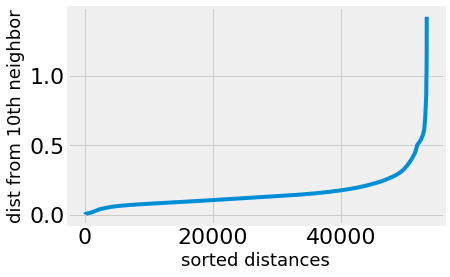

In [33]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# Hierarchical clustering

While no clear cluster emerged with k-means, we could not perform HC on a subset of data

In [34]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

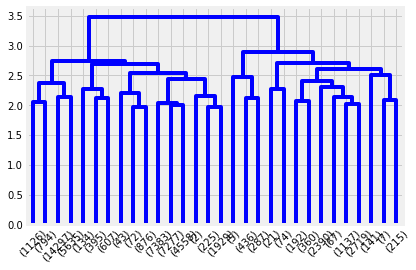

In [35]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

No clusters are found

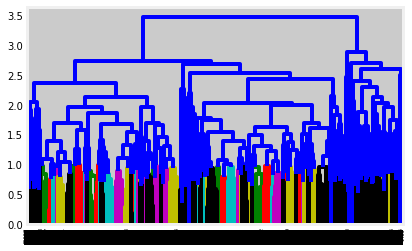

In [36]:
res = dendrogram(data_link, color_threshold=1.0)

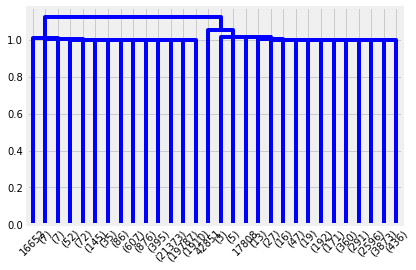

In [37]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

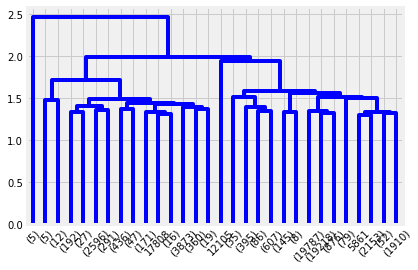

In [38]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

No evident cluster is found even in single-link

Now I try to compute single-link on the clusters obtained in k-means

for example cluster 9 that seems signnificant

In [39]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

In [40]:
cluster_9 = cluster_map[cluster_map.cluster == 9]

In [41]:
cluster_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 2 to 53376
Data columns (total 2 columns):
data_index    1824 non-null int64
cluster       1824 non-null int32
dtypes: int32(1), int64(1)
memory usage: 35.6 KB


In [42]:
c_9 = pd.DataFrame()
c_9 = df.loc[cluster_9['data_index'], :]
c_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 2 to 53744
Data columns (total 17 columns):
IsBadBuy                       1824 non-null int64
PurchDate                      1824 non-null float64
Auction                        1824 non-null float64
VehicleAge                     1824 non-null float64
Make                           1824 non-null float64
Transmission                   1824 non-null float64
WheelType                      1824 non-null float64
VehOdo                         1824 non-null float64
Nationality                    1824 non-null float64
Size                           1824 non-null float64
TopThreeAmericanName           1824 non-null int64
MMRCurrentAuctionCleanPrice    1824 non-null float64
MMRCurrentRetailCleanPrice     1824 non-null float64
VNST                           1824 non-null float64
VehBCost                       1824 non-null float64
IsOnlineSale                   1824 non-null int64
WarrantyCost                   1824 non-null float

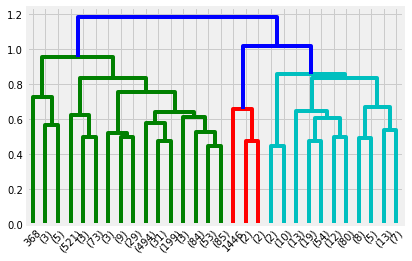

In [43]:
data_dist = pdist(c_9, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

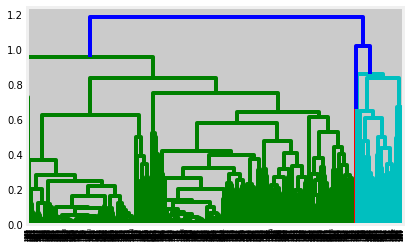

In [44]:
res = dendrogram(data_link, color_threshold=1.0)

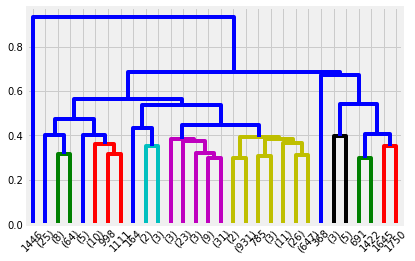

In [45]:
data_dist = pdist(c_9, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')